INFO:clustering_pipeline:Data loaded successfully from the database.
2024/11/04 18:25:11 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet




The optimal number of clusters is: 10 with a silhouette score of 0.9444451498854253

Cluster 0:

Number of users in cluster: 510

Common privileges (present in over 50% of users):
Aebleroed-IIV01-7570             100.000000
Email Authentication             100.000000
Fasit_Forsikredeledige           100.000000
Fasit_Ressourceteam              100.000000
ScanJour_Administrator           100.000000
IDC-AppDashboard-User            100.000000
ScanJour_Læse adgang - GRØN      100.000000
ScanJour_Læse adgang - GUL       100.000000
ScanJour_Skrive adgang - GUL     100.000000
ScanJour_Mailling list - GUL     100.000000
ScanJour_Mailling list - RØD     100.000000
ScanJour_Skrive adgang - GRØN    100.000000
ServiceDesk Nyhedsbrev           100.000000
ScanJour_Skrive adgang - RØD     100.000000
ServiceDesk User                 100.000000
Fasit_Fleksjob                    97.254902
dtype: float64

Top 5 privileges in the cluster:
Fasit_Forsikredeledige    100.0
Email Authentication      100.0
Ae

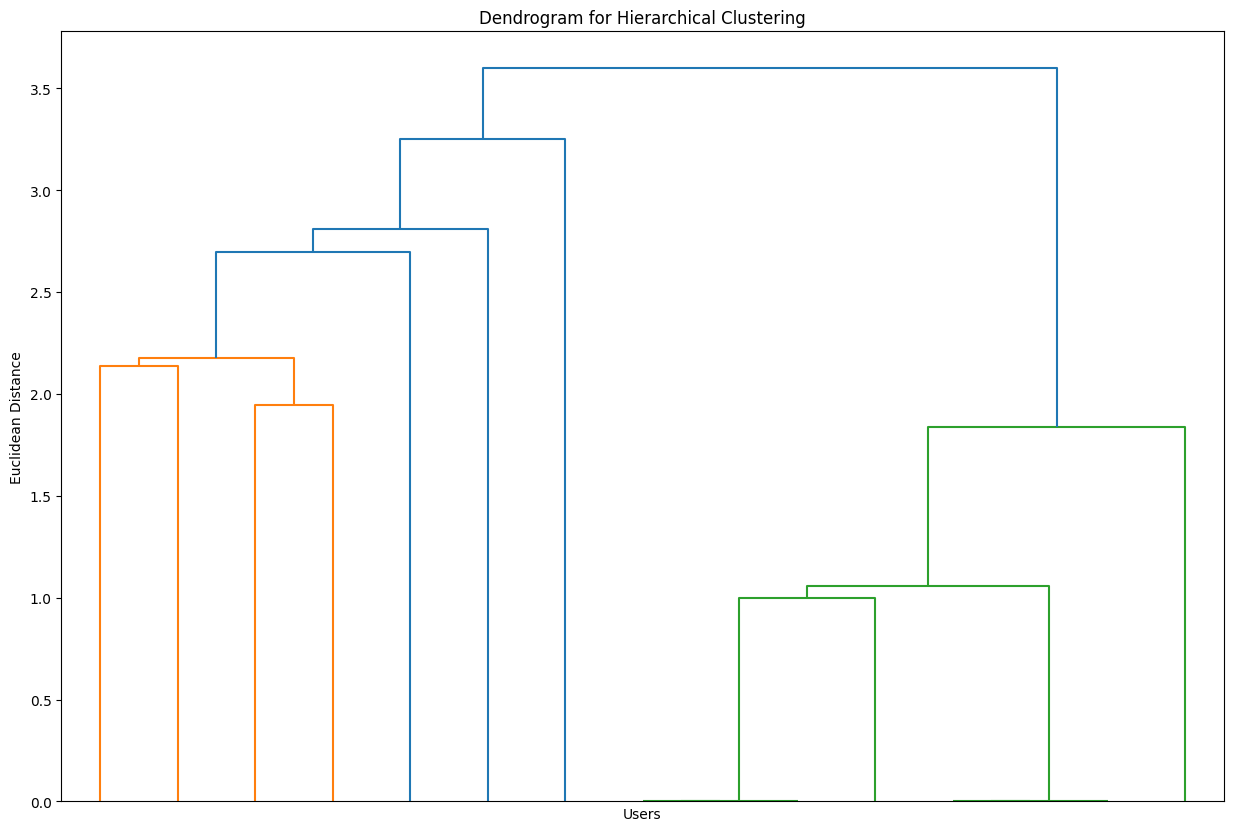

In [1]:
from connect import db_name
from clustering_pipeline import fetch_data, run_pipeline

# Main pipeline execution
sql_query = f"""
    SELECT 
        urm.user_id,
        sr.name AS system_role_name
    FROM 
        {db_name}.user_roles_mapping urm
    JOIN 
        {db_name}.system_role_assignments sra ON urm.user_role_id = sra.user_role_id
    JOIN 
        {db_name}.system_roles sr ON sra.system_role_id = sr.id;
"""

# Execute the data fetching process
df = fetch_data(sql_query)

run_pipeline(df)